<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/5_Kinds_of_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
folder = '/content/drive/MyDrive/BAOCAOAI/Flower/Flower_Train/'
photos, labels = list(), list()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('dandelion'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sunflower'):
    output = 4.0 
  if file.startswith('tulip'):
    output = 5.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(4103, 50, 50, 3) (4103,)


In [ ]:
# Save data after preprocessing data
save('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerphoto.npy', photos)
save('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerlabels.npy', labels)

In [ ]:
# Read data
photos = np.load('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerphoto.npy')
labels = np.load('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerlabels.npy')

In [ ]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=6)

In [ ]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [ ]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6, activation='softmax'))

In [ ]:
print(x_train.shape,y_train.shape)

(4103, 50, 50, 3) (4103, 6)


In [ ]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
69/69 [==============================] - 10s 11ms/step - loss: 1.3007 - accuracy: 0.4441
Epoch 2/10
69/69 [==============================] - 1s 8ms/step - loss: 1.0438 - accuracy: 0.5808
Epoch 3/10
69/69 [==============================] - 1s 8ms/step - loss: 0.9159 - accuracy: 0.6383
Epoch 4/10
69/69 [==============================] - 1s 8ms/step - loss: 0.8151 - accuracy: 0.6841
Epoch 5/10
69/69 [==============================] - 1s 8ms/step - loss: 0.7196 - accuracy: 0.7231
Epoch 6/10
69/69 [==============================] - 1s 8ms/step - loss: 0.6393 - accuracy: 0.7587
Epoch 7/10
69/69 [==============================] - 1s 8ms/step - loss: 0.5367 - accuracy: 0.7972
Epoch 8/10
69/69 [==============================] - 1s 8ms/step - loss: 0.4373 - accuracy: 0.8413
Epoch 9/10
69/69 [==============================] - 1s 8ms/step - loss: 0.3299 - accuracy: 0.8884
Epoch 10/10
69/69 [==============================] - 1s 8ms/step - loss: 0.2695 - accuracy: 0.9057


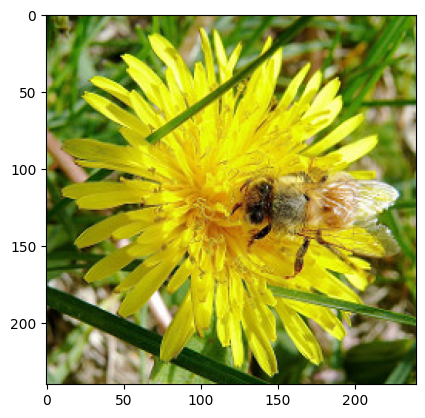

1/1 [==============================] - 0s 34ms/step
2
Hoa:  Dandelion


In [ ]:
# Mở ảnh
img = Image.open('/content/dandelion (159).jpg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((50, 50))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,50,50,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Daisy","Dandelion","Rose","Sunflower","Tulip"]
temp1 = matrix[0]
print(temp1)
print("Hoa: ", class_names[temp1])


In [ ]:
model.save('/content/drive/MyDrive/BAOCAOAI/Flower/Model/5_kinds_of_flowers.h5')